In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from metrics import accuracy
from parzen import Parzen_Window_Classifier
from sklearn.svm import SVC
from svm import SVM

In [2]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Оставляем только два линейно разделимых класса
mask = y != 2
X_train = X[mask]
y_train = y[mask]
y_train = np.where(y_train == 0, -1, 1)
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

In [3]:
def plot_hyperplane(X, w, b, offset):
    return (-w[0] * X + b + offset) / w[1]

def plot_svm(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
    x0_1 = np.min(X[:, 0])
    x0_2 = np.max(X[:, 0])

    x1_1 = plot_hyperplane(x0_1, w, b, 0)
    x1_2 = plot_hyperplane(x0_2, w, b, 0)

    x1_1n = plot_hyperplane(x0_1, w, b, -1)
    x1_2n = plot_hyperplane(x0_2, w, b, -1)

    x1_1p = plot_hyperplane(x0_1, w, b, 1)
    x1_2p = plot_hyperplane(x0_2, w, b, 1)
    plt.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    plt.plot([x0_1, x0_2], [x1_1n, x1_2n], 'k')
    plt.plot([x0_1, x0_2], [x1_1p, x1_2p], 'k')
    plt.show()

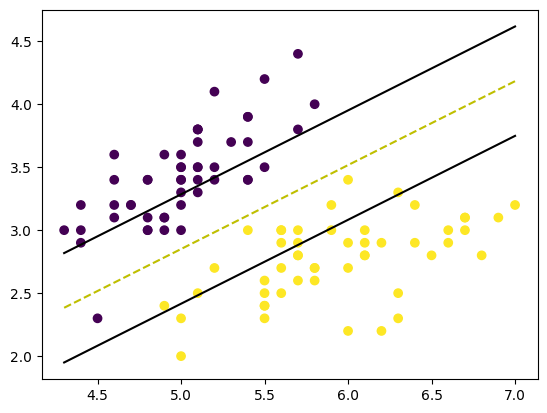

In [ ]:
svm = SVM()
svm.fit(X_train, y_train)
w, b = svm.w, svm.b
plot_svm(X_train, y_train, w, b)


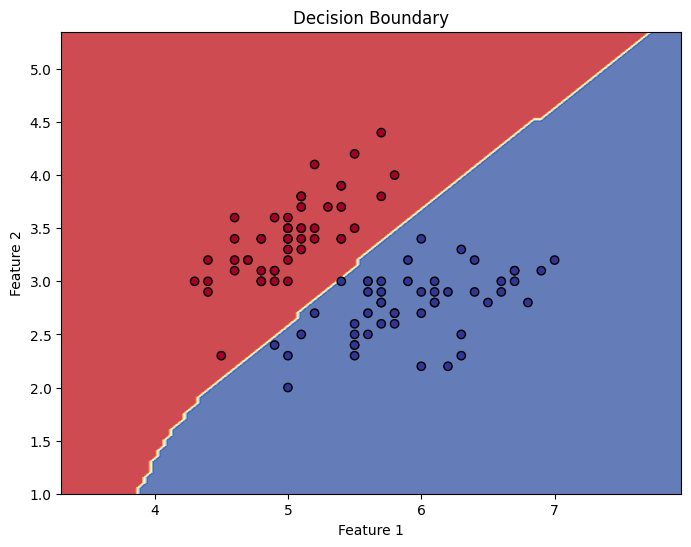

In [38]:
from utils import plot_decision_boundary

p_window = Parzen_Window_Classifier(kernel_function='gaussian', h=1)
p_window.fit(X_train, y_train)
plot_decision_boundary(p_window, X_train, y_train)